A análise da Distância Intra-clusters também pode ser útil para decidir o número ideal de clusters K no algoritmo K-means.
A Distância Intra-clusters, também conhecida como dispersão Intra-clusters ou inércia Intra-clusters, mede a compactação dos clusters, ou seja, a média das distâncias dos pontos dentro de cada cluster aos seus respectivos centroides.

Ao realizar uma análise da Distância Intra-clusters para diferentes valores de K, podemos observar como a dispersão dentro dos clusters diminui à medida que o número de clusters aumenta. Idealmente, gostaríamos de encontrar um ponto onde a redução na Distância Intra-clusters diminui significativamente para valores de K maiores, indicando que a adição de mais clusters não está resultando em uma compactação significativamente melhor dos dados.

---

# Exemplo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Distâncias Intra Cluster:
Cluster 0: 56.08
Cluster 1: 58.81
Cluster 2: 54.96
Cluster 3: 53.04


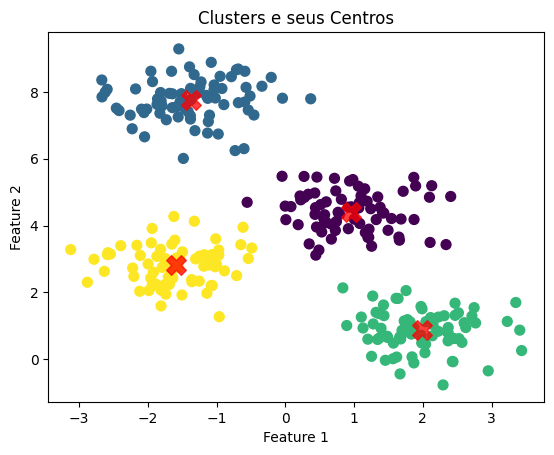

In [3]:
# 1. Gerando um conjunto de dados de exemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Aplicando K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# 3. Obtendo os rótulos e os centros dos clusters
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 4. Calculando a distância intra-cluster
intra_cluster_distances = []
for i in range(kmeans.n_clusters):
    cluster_points = X[labels == i]
    distance = np.sum(np.linalg.norm(cluster_points - centers[i], axis=1))
    intra_cluster_distances.append(distance)

# 5. Exibindo os resultados
print("Distâncias Intra Cluster:")
for i, distance in enumerate(intra_cluster_distances):
    print(f"Cluster {i}: {distance:.2f}")

# 6. Visualizando os clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters e seus Centros')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()